# Clip installation:

pip install ftfy regex tqdm

pip install git+https://github.com/openai/CLIP.git


In [1]:
from transformers import CLIPProcessor, CLIPModel

model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

2024-04-17 18:09:01.199872: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-17 18:09:01.225514: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-17 18:09:01.736640: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
import torch
import clip
from PIL import Image
import requests

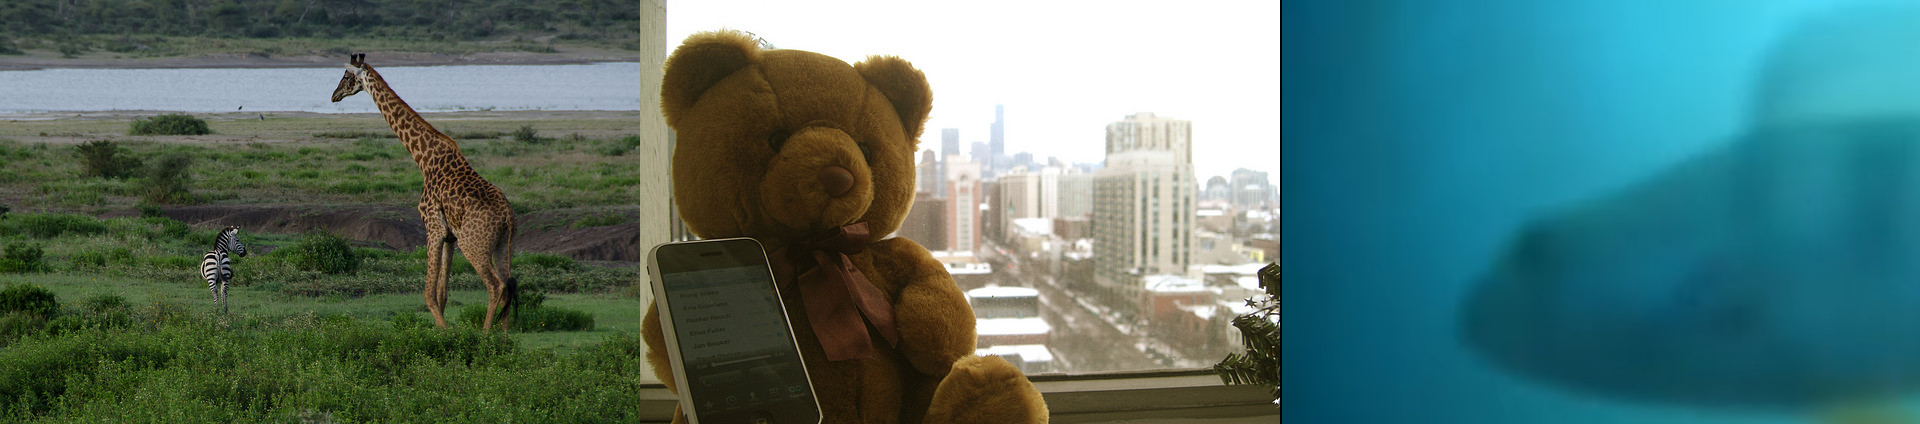

In [3]:
def image_grid(imgs, cols):
    rows = (len(imgs) + cols - 1) // cols
    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

image_urls = [
    'http://images.cocodataset.org/val2014/COCO_val2014_000000159977.jpg',  
    'http://images.cocodataset.org/val2014/COCO_val2014_000000174070.jpg',
    ]
images = []
for url in image_urls:
    images.append(Image.open(requests.get(url, stream=True).raw))

images.append(Image.open("fish.png"))

grid = image_grid(images, cols=3)
display(grid)

In [4]:
# %% Zero-shot classification
classes = ['giraffe', 'zebra', 'elephant', 'teddybear', 'fish']
inputs = processor(text=classes, images=images, return_tensors="pt", padding=True)

outputs = model(**inputs)
logits_per_image = outputs.logits_per_image  # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1)  # we can take the softmax to get the label probabilities

In [5]:
print( 'First is: {v}'.format(v=classes[torch.argmax(probs[0])]) )
print( 'Second is: {v}'.format(v=classes[torch.argmax(probs[1])]) )
print( 'Third is: {v}'.format(v=classes[torch.argmax(probs[2])]) )

First is: giraffe
Second is: teddybear
Third is: fish
